# Машинное обучение

# Семинар 6

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Разреженные матрицы

Разреженная матрица — это матрица, большинство элементов которой равны нулю. Такие матрицы возникают во многих областях науки, в том числе и в машинном обучении.

Для разреженных матриц можно определить следующие характеристики:
- разреженность (sparsity) — доля нулевых элементов матрицы,
- плотность (density) — доля ненулевых элементов матрицы, или $1 - \text{sparsity}$.

Для разреженных матриц существуют специальные способы их хранения в памяти компьютера, при которых хранятся только ненулевые значения, тем самым сокращается объём занимаемой памяти. Эти способы реализованы в библиотеке [scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html). Кроме того, разреженные матрицы поддерживаются большинством реализаций методов машинного обучения.

In [2]:
import numpy as np
import scipy.sparse as sp

### COOrdinate format

[Координатный формат](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html#scipy.sparse.coo_matrix) задаёт матрицу при помощи троек (индекс строки, индекс столбца, значение элемента), описывающих ненулевые элементы матрицы. Как правило, тройки сортируют по индексу строки, а затем индексу столбца для ускорения работы.

Объём занимаемой памяти — $O(n),$ где $n$ — число ненулевых элементов в матрице.

In [3]:
m = (np.arange(9) + 1).reshape(3,3)
print(m)
sparse_m = sp.coo_matrix(m)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [4]:
for i in range(len(sparse_m.data)):
    print('(%d, %d, %d)' % (sparse_m.row[i], sparse_m.col[i], sparse_m.data[i]))

(0, 0, 1)
(0, 1, 2)
(0, 2, 3)
(1, 0, 4)
(1, 1, 5)
(1, 2, 6)
(2, 0, 7)
(2, 1, 8)
(2, 2, 9)


Для матрицы, содержащей нулевые элементы, имеем:

In [5]:
m = np.eye(3)*np.arange(1,4)
print(m)
sparse_m = sp.coo_matrix(m)

[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]


In [6]:
for i in range(len(sparse_m.data)):
    print('(%d, %d, %d)' % (sparse_m.row[i], sparse_m.col[i], sparse_m.data[i]))

(0, 0, 1)
(1, 1, 2)
(2, 2, 3)


### Compressed Sparse Row matrix

[CSR формат](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html#scipy.sparse.csr_matrix) — разреженная по строчкам матрица.

<img src="images/arrays.png">

Формат задаёт матрицу при помощи трёх массивов:
1. $i$-ый элемент первого массива соответствует $i$-ой строке и содержит индекс некоторого элемента во втором массиве.
2. Во втором массиве по порядку для каждой строки записаны индексы столбцов ненулевых элементов.
3. Третий массив имеет такую же длину, как и второй, и содержит значения соответствующих ненулевых элементов.

Обозначим описанные массивы $a,b,c$. Для получения элемента матрицы на позиции $(i, j)$ необходимо осуществить следующую последовательность действий:
1. Получить значения $a[i]=k_{left}, a[i+1]=k_{right}$.
2. Тогда индексы столбцов ненулевых элементов $i$-ой строки будут находиться в "подмассиве" $b[k_{left}:k_{right}]$.
3. В цикле перебираем элементы подмассива $b[k_{left}:k_{right}]$, пока не встретим элемент, равный $j$.
4. Если такой элемент обнаружен на позиции $m$ (в терминах массива $b$), то ответом является значение $c[m]$.
5. Иначе ответом является 0.если мы не встретили элемент, равный $j$, то возвращаем $0$.

Объём занимаемой памяти — $O(n)$, где $n$ — число ненулевых элементов.

In [7]:
m = (np.arange(9) + 1).reshape(3,3)
print(m)
sparse_m = sp.csr_matrix(m)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [8]:
print('a', sparse_m.indptr)
print('b', sparse_m.indices)
print('c', sparse_m.data)

a [0 3 6 9]
b [0 1 2 0 1 2 0 1 2]
c [1 2 3 4 5 6 7 8 9]


Для матрицы, содержащей нулевые элементы:

In [9]:
m = np.tril(np.arange(1,4))
print(m)
sparse_m = sp.csr_matrix(m)

[[1 0 0]
 [1 2 0]
 [1 2 3]]


In [10]:
print('a', sparse_m.indptr)
print('b', sparse_m.indices)
print('c', sparse_m.data)

a [0 1 3 6]
b [0 0 1 0 1 2]
c [1 1 2 1 2 3]


### Compressed Sparse Column matrix

[CSC формат](http://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_matrix.html#scipy.sparse.csc_matrix) — разреженная по столбцам матрица.

Формат CSC задаёт матрицу аналогично формату CSR, но при этом элементы первого массива соответствуют столбцам, а не строкам.

Объём занимаемой памяти — $O(n)$, где $n$ — число ненулевых элементов.

In [11]:
m = (np.arange(9) + 1).reshape(3,3)
print(m)
sparse_m = sp.csc_matrix(m)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [12]:
print('a', sparse_m.indptr)
print('b', sparse_m.indices)
print('c', sparse_m.data)

a [0 3 6 9]
b [0 1 2 0 1 2 0 1 2]
c [1 4 7 2 5 8 3 6 9]


In [13]:
m = np.tril(np.arange(1,4))
print(m)
sparse_m = sp.csc_matrix(m)

[[1 0 0]
 [1 2 0]
 [1 2 3]]


In [14]:
print('a', sparse_m.indptr)
print('b', sparse_m.indices)
print('c', sparse_m.data)

a [0 3 5 6]
b [0 1 2 1 2 2]
c [1 1 1 2 2 3]


## Умножение разреженных матриц

Как мы убедились, объём занимаемой памяти практически не отличается для всех вариантов хранения разреженных матриц. В таком случае использование какого из вариантов даёт больше преимуществ? Оказывается, что все три способа кардинально различаются по времени умножения матриц.

Для начала вспомним правило умножения матриц:
$$C = A\cdot B$$
$$C_{ij} = \sum_k A_{ik}B_{kj}$$

Для нахождения элемента $C_{ij}$ необходимо получить $i$-ую строчку матрицы $A$ и $j$-ый столбец матрицы $B$. Исследуем время выполнения этих операций для каждого из форматов:

- **COO.** Стоимость получения строки — $O(n)$. Стоимость получения столбца — $O(n)$. При условии, что тройки отсортированы, время поиска можно сократить, воспользовавшись бинарным поиском.
- **CSR.** Стоимость получения строки — $O(1)$. Стоимость получения столбца — $O(n)$.
- **CSC.** Стоимость получения строки — $O(n)$. Стоимость получения столбца — $O(1)$.

Таким образом, время перемножения матриц будет оптимальным, если матрица $A$ задаётся в формате CSR, а матрица $B$ — в формате CSC.

## Разреженные матрицы в линейных моделях

Рассмотрим задачу линейной регрессии с функционалом качества MSE:

$$Q = ||Xw - y||^2 \rightarrow \min_{w}.$$

Как уже говорилось на предыдущих семинарах, вместо нахождения оптимального значения вектора $w$ используют градиентные методы оптимизации функционала. Запишем формулу его градиента:

$$\frac{\partial Q}{\partial w} = 2X^T(Xw - y).$$

Заметим, что матрица $X$, заданная в формате CSR, может быть представлена как $X^T$ в формате CSC (действительно, используя те же массивы, мы можем придать им "симметричный" смысл).

Рассмотрим, как осуществляется умножение разреженной матрицы $A$ на вектор $z$:

1) **CSR**
$$(Az)_{i} = \sum_{k}A_{ik}z_k.$$

Для матрицы в формале CSR обращение к строчкам матрицы выполняется за $O(1)$, поэтому перемножение выполняется за $O(n)$, где $n$ — кол-во ненулевых элементов матрицы $X$.
    
2) **CSC**

Для матрицы в формате CSC обращение к строчкам матрицы выполняется за $O(n)$. В этом случае умножение будем производить следующим образом:
    - Аллоцируем результирующий вектор, который предварительно заполним нулями.
    - Обращаемся к $i$-ому столбцу матрицы $A$ и $i$-ому элементу вектора $z$.
    - Каждый ненулевой элемент в столбце домножаем на $z_i$ и добавляем результат к соответствующему значению результирующего вектора.
    
Итого, для умножения разреженной матрицы на вектор получаем следующую асимптотику:
 - $O(l)$ по памяти;
 - $O(n)$ по времени.

Таким образом, мы описали процедуру умножения разреженной матрицы на вектор, и теперь её можно применить для вычисления градиента в задачах с разреженными матрицами "объект-признак".

## Работа с текстовыми данными

Разреженные матрицы имеют место в машинном обучении, в частности, в задачах обработки текстов.

Как правило, модели машинного обучения действуют в предположении, что матрица "объект-признак" является вещественнозначной, поэтому при работе с текстами сперва для каждого из них необходимо составить его признаковое описание. Для этого широко используются техники векторизации, tf-idf и пр. Рассмотрим их на примере [датасета](https://www.dropbox.com/s/18i7lqac9rr4pnx/banki_responses.json.bz2?dl=0) отзывов о банках.

Сперва загрузим данные:

In [15]:
!pip install requests pandas bs4 openpyxl

In [16]:
import json
import bz2
import regex
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:

# URL
url = 'https://banki.ru/insurance/responses/company/sberbankstrahovaniezhizni'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

try:
    responses = requests.get(url, headers=headers)
    responses.raise_for_status()
    soup = BeautifulSoup(responses.text, 'html.parser')

    # DataFrame с заданными колонками
    df = pd.DataFrame(columns=['url жалобы', 'Заголовок', 'Текст', 'Время', 'Оценка'])
    articles = soup.find_all('div', class_='responses__item')  # Пробуем разные селекторы

    # Перебираем отзывы
    for article in articles:
        try:
            a_tag = article.find('a', class_='responses__item__message')
            href = a_tag.get('href') if a_tag else None
            header = a_tag.text.strip() if a_tag else None
            text_tag = article.find('div', class_='responses__item__message__text')
            text = text_tag.text.strip() if text_tag else None
            time_tag = article.find('time')
            time = time_tag.get('datetime') if time_tag else None
            rating_tag = article.find('span', class_='responses__item__rating')
            rating = rating_tag.text.strip() if rating_tag else None
            row = [href, header, text, time, rating]
            df.loc[len(df)] = row
        except Exception as e:
            print(f"Ошибка при обработке отзыва: {e}")
            continue
    print(df)

    # Сохраняем в Excel-файл
    df.to_excel('жалобы.xlsx', index=False)

except requests.exceptions.RequestException as e:
    print(f"Ошибка при выполнении запроса: {e}")
except Exception as e:
    print(f"Произошла ошибка: {e}")

Empty DataFrame
Columns: [url жалобы, Заголовок, Текст, Время, Оценка]
Index: []


Данные содержат тексты отзывов о банках, некоторую дополнительную информацию, а также оценку банка от 1 до 5. Посмотрим на пример отзыва:

In [18]:
data = {
    'Текст': [
        'Ужасное обслуживание, не рекомендую этот банк',
        'Средний сервис, но менеджеры вежливые',
        'Отличный банк, быстрые переводы, хорошие условия',
        'Плохая работа call-центра, долгое ожидание',
        'Прекрасный сервис, всё на высшем уровне'
    ],
    'Оценка': [1, 3, 5, 2, 5]
}

df = pd.DataFrame(data)
print("Искусственные данные для демонстрации:")
print(df)

Искусственные данные для демонстрации:
                                              Текст  Оценка
0     Ужасное обслуживание, не рекомендую этот банк       1
1             Средний сервис, но менеджеры вежливые       3
2  Отличный банк, быстрые переводы, хорошие условия       5
3        Плохая работа call-центра, долгое ожидание       2
4           Прекрасный сервис, всё на высшем уровне       5


Сформируем выборку отзывов, предобработав их аналогичным образом, и вектор ответов:

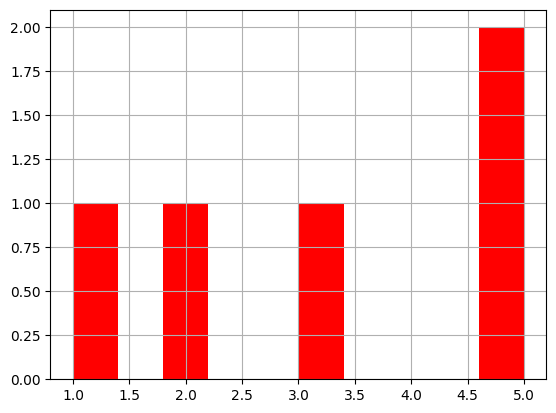

In [19]:
plt.hist(df['Оценка'], color='red')
plt.grid()
plt.show()

### Векторизация

Самый очевидный способ формирования признакового описания текстов — векторизация. Пусть у нас имеется коллекция текстов $D = \{d_i\}_{i=1}^l$ и словарь всех слов, встречающихся в выборке $V = \{v_j\}_{j=1}^d.$ В этом случае некоторый текст $d_i$ описывается вектором $(x_{ij})_{j=1}^d,$ где
$$x_{ij} = \sum_{v \in d_i} [v = v_j].$$

Таким образом, текст $d_i$ описывается вектором количества вхождений каждого слова из словаря в данный текст.

In [20]:
data = {
    'Текст': [
        'Ужасное обслуживание, не рекомендую этот банк',
        'Средний сервис, но менеджеры вежливые',
        'Отличный банк, быстрые переводы, хорошие условия',
        'Плохая работа call-центра, долгое ожидание',
        'Прекрасный сервис, всё на высшем уровне'
    ],
    'Оценка': [1, 3, 5, 2, 5]
}

df = pd.DataFrame(data)
vectorizer = CountVectorizer(encoding='utf-8', min_df=1)
X = vectorizer.fit_transform(df['Текст'])

print("Размерность матрицы:", X.shape)
print("Словарь признаков:", vectorizer.get_feature_names_out())
print("Матрица:\n", X.toarray())

Размерность матрицы: (5, 27)
Словарь признаков: ['call' 'банк' 'быстрые' 'вежливые' 'всё' 'высшем' 'долгое' 'менеджеры'
 'на' 'не' 'но' 'обслуживание' 'ожидание' 'отличный' 'переводы' 'плохая'
 'прекрасный' 'работа' 'рекомендую' 'сервис' 'средний' 'ужасное' 'уровне'
 'условия' 'хорошие' 'центра' 'этот']
Матрица:
 [[0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]
 [0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0]]


Результатом является разреженная матрица.

In [21]:
vectorizer.transform(df['Текст'][:1])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 27)>

In [22]:
print(vectorizer.transform(df['Текст'][:1]).indptr)
print(vectorizer.transform(df['Текст'][:1]).indices)
print(vectorizer.transform(df['Текст'][:1]).data)

[0 6]
[ 1  9 11 18 21 26]
[1 1 1 1 1 1]


### TF-IDF

Ещё один способ работы с текстовыми данными — [TF-IDF](https://en.wikipedia.org/wiki/Tf–idf) (**T**erm **F**requency–**I**nverse **D**ocument **F**requency). Рассмотрим коллекцию текстов $D$.  Для каждого уникального слова $t$ из документа $d \in D$ вычислим следующие величины:

1. Term Frequency – количество вхождений слова в отношении к общему числу слов в тексте:
$$\text{tf}(t, d) = \frac{n_{td}}{\sum_{t \in d} n_{td}},$$
где $n_{td}$ — количество вхождений слова $t$ в текст $d$.
1. Inverse Document Frequency
$$\text{idf}(t, D) = \log \frac{\left| D \right|}{\left| \{d\in D: t \in d\} \right|},$$
где $\left| \{d\in D: t \in d\} \right|$ – количество текстов в коллекции, содержащих слово $t$.

Тогда для каждой пары (слово, текст) $(t, d)$ вычислим величину:
$$\text{tf-idf}(t,d, D) = \text{tf}(t, d)\cdot \text{idf}(t, D).$$

Отметим, что значение $\text{tf}(t, d)$ корректируется для часто встречающихся общеупотребимых слов при помощи значения $\text{idf}(t, D).$

Признаковым описанием одного объекта $d \in D$ будет вектор $\bigg(\text{tf-idf}(t,d, D)\bigg)_{t\in V}$, где $V$ – словарь всех слов, встречающихся в коллекции $D$.

In [23]:
data = {
    'Текст': [
        'Ужасное обслуживание, не рекомендую этот банк',
        'Средний сервис, но менеджеры вежливые',
        'Отличный банк, быстрые переводы, хорошие условия',
        'Плохая работа call-центра, долгое ожидание',
        'Прекрасный сервис, всё на высшем уровне'
    ],
    'Оценка': [1, 3, 5, 2, 5]
}

df = pd.DataFrame(data)

vectorizer = CountVectorizer(encoding='utf-8', min_df=1)
X = vectorizer.fit_transform(df['Текст'])

print("Размерность матрицы:", X.shape)
print("Словарь признаков:", vectorizer.get_feature_names_out())
print("Матрица:\n", X.toarray())

Размерность матрицы: (5, 27)
Словарь признаков: ['call' 'банк' 'быстрые' 'вежливые' 'всё' 'высшем' 'долгое' 'менеджеры'
 'на' 'не' 'но' 'обслуживание' 'ожидание' 'отличный' 'переводы' 'плохая'
 'прекрасный' 'работа' 'рекомендую' 'сервис' 'средний' 'ужасное' 'уровне'
 'условия' 'хорошие' 'центра' 'этот']
Матрица:
 [[0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]
 [0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0]]


На выходе получаем разреженную матрицу.

In [24]:
vectorizer.transform(df['Текст'][:1])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 27)>

In [25]:
print(vectorizer.transform(df['Текст'][:1]).indptr)
print(vectorizer.transform(df['Текст'][:1]).indices)
print(vectorizer.transform(df['Текст'][:1]).data)

[0 6]
[ 1  9 11 18 21 26]
[1 1 1 1 1 1]


Заметим, что оба метода возвращают вектор длины 72477 (размер нашего словаря).

## Лемматизация и стемминг

Заметим, что одно и то же слово может встречаться в различных формах (например, "сотрудник" и "сотрудника"), но описанные выше методы интерпретируют их как различные слова, что делает признаковое описание избыточным. Устранить эту проблему можно при помощи **лемматизации** и **стемминга**.

### Стемминг

[**Stemming**](https://en.wikipedia.org/wiki/Stemming) –  это процесс нахождения основы слова. В результате применения данной процедуры однокоренные слова, как правило, преобразуются к одинаковому виду.

**Примеры стемминга:**

| Word        | Stem           |
| ----------- |:-------------:|
| вагон | вагон |
| вагона | вагон |
| вагоне | вагон |
| вагонов | вагон |
| вагоном | вагон |
| вагоны | вагон |
| важная | важн |
| важнее | важн |
| важнейшие | важн |
| важнейшими | важн |
| важничал | важнича |
| важно | важн |

[Snowball](http://snowball.tartarus.org/) – фрэймворк для написания алгоритмов стемминга. Алгоритмы стемминга отличаются для разных языков и используют знания о конкретном языке – списки окончаний для разных чистей речи, разных склонений и т.д. Пример алгоритма для русского языка – [Russian stemming](http://snowballstem.org/algorithms/russian/stemmer.html).

In [26]:
stemmer = nltk.stem.snowball.RussianStemmer()
print(stemmer.stem(u'машинное'), stemmer.stem(u'обучение'))

машин обучен


In [27]:
def stem_text(text, stemmer):
    tokens = text.split()
    return ' '.join(map(lambda w: stemmer.stem(w), tokens))

stemmed_texts = []
for t in tqdm(df['Текст'][:1000]):
    stemmed_texts.append(stem_text(t, stemmer))

100%|██████████| 5/5 [00:00<00:00, 1871.12it/s]


In [28]:
print(df['Текст'][4])

Прекрасный сервис, всё на высшем уровне


In [29]:
print(stemmed_texts[4])

прекрасн сервис, все на высш уровн


In [30]:
len(df['Текст'])

5

К сожалению, стеммер русского языка работает довольно медленно, – 1000 отзывов обрабатываются за 26 секунд, поэтому время обработки всей выборки можно грубо оценить в 40 минут. В связи с этим в рамках семинара мы не будем проводить полную обработку всей выборки, однако вы можете проверить результат работы самостоятельно.

### Лемматизация

[Лемматизация](https://en.wikipedia.org/wiki/Lemmatisation) — процесс приведения слова к его нормальной форме (**лемме**):
- для существительных — именительный падеж, единственное число;
- для прилагательных — именительный падеж, единственное число, мужской род;
- для глаголов, причастий, деепричастий — глагол в инфинитиве.

## Классификация

Воспользуемся изученными методами обработки текстов для решения задачи классификации отзывов на отзывы с положительной оценкой и отзывы с отрицательной оценкой. Будем считать отзывы с оценками 4-5 положительными, а остальные — отрицательными.

In [31]:
data = {
    'Текст': [
        'Ужасное обслуживание, не рекомендую этот банк',
        'Средний сервис, но менеджеры вежливые',
        'Отличный банк, быстрые переводы, хорошие условия',
        'Плохая работа call-центра, долгое ожидание',
        'Прекрасный сервис, всё на высшем уровне'
    ],
    'Оценка': [1, 3, 5, 2, 5]
}

df = pd.DataFrame(data)

vectorizer = CountVectorizer(encoding='utf-8', min_df=1)
X = vectorizer.fit_transform(df['Текст'])

print("Размерность матрицы:", X.shape)
print("Словарь признаков:", vectorizer.get_feature_names_out())
print("Матрица:\n", X.toarray())

Размерность матрицы: (5, 27)
Словарь признаков: ['call' 'банк' 'быстрые' 'вежливые' 'всё' 'высшем' 'долгое' 'менеджеры'
 'на' 'не' 'но' 'обслуживание' 'ожидание' 'отличный' 'переводы' 'плохая'
 'прекрасный' 'работа' 'рекомендую' 'сервис' 'средний' 'ужасное' 'уровне'
 'условия' 'хорошие' 'центра' 'этот']
Матрица:
 [[0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]
 [0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0]]


In [32]:
X = vectorizer.transform(df['Текст'])
Y = (np.array(df['Оценка']) > 3).astype(int)

In [33]:
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_ids, test_ids in cv.split(X):  # <- Обратите внимание на .split(X)
    lr = LogisticRegression()
    lr.fit(X[train_ids], Y[train_ids])
    preds = lr.predict_proba(X[test_ids])[:, 1]
    print('ROC-AUC: %.3f, ACC: %.3f' % (
        roc_auc_score(Y[test_ids], preds),
        accuracy_score(Y[test_ids], (preds > 0.5).astype(int))
    ))

ROC-AUC: 0.500, ACC: 0.500


In [34]:
data = {
    'Текст': [
        'Ужасное обслуживание, не рекомендую этот банк',
        'Средний сервис, но менеджеры вежливые',
        'Отличный банк, быстрые переводы, хорошие условия',
        'Плохая работа call-центра, долгое ожидание',
        'Прекрасный сервис, всё на высшем уровне'
    ],
    'Оценка': [1, 3, 5, 2, 5]
}

df = pd.DataFrame(data)

# Правильная векторизация
vectorizer = CountVectorizer(encoding='utf-8', min_df=1)
X = vectorizer.fit_transform(df['Текст'])

print("Размерность матрицы:", X.shape)
print("Словарь признаков:", vectorizer.get_feature_names_out())
print("Матрица:\n", X.toarray())

Размерность матрицы: (5, 27)
Словарь признаков: ['call' 'банк' 'быстрые' 'вежливые' 'всё' 'высшем' 'долгое' 'менеджеры'
 'на' 'не' 'но' 'обслуживание' 'ожидание' 'отличный' 'переводы' 'плохая'
 'прекрасный' 'работа' 'рекомендую' 'сервис' 'средний' 'ужасное' 'уровне'
 'условия' 'хорошие' 'центра' 'этот']
Матрица:
 [[0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1]
 [0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0]]


In [35]:
X = vectorizer.transform(df['Текст'])
Y = (np.array(df['Оценка']) > 3).astype(int)

In [36]:
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_ids, test_ids in cv.split(X):
    lr = LogisticRegression()
    lr.fit(X[train_ids], Y[train_ids])
    preds = lr.predict_proba(X[test_ids])[:, 1]
    print('ROC-AUC: %.3f, ACC: %.3f' % (
        roc_auc_score(Y[test_ids], preds),
        accuracy_score(Y[test_ids], (preds > 0.5).astype(int))
    ))

ROC-AUC: 0.500, ACC: 0.500


## Важность признаков

Как уже упоминалось ранее, веса признаков в линейной модели в случае, если признаки отмасштабированы, характеризуют степень их влияния на значение целевой переменной. В задаче классификации текстов, кроме того, признаки являются хорошо интерпретируемыми, поскольку каждый из них соответствует конкретному слову. Изучим влияние конкретных слов на значение целевой переменной:

In [37]:
f_weights = zip(vectorizer.get_feature_names_out(), lr.coef_[0])
f_weights = sorted(f_weights, key=lambda i: i[1])

# Топ-10 самых положительных весов
print("Самые положительные веса:")
for i in range(1, 11):
    print('%s, %.2f' % f_weights[-i])

print('\n...\n')

# Топ-10 самых отрицательных весов
print("Самые отрицательные веса:")
for i in range(10):
    print('%s, %.2f' % f_weights[i])

Самые положительные веса:
хорошие, 0.31
условия, 0.31
переводы, 0.31
отличный, 0.31
быстрые, 0.31
банк, 0.14
уровне, 0.00
средний, 0.00
сервис, 0.00
прекрасный, 0.00

...

Самые отрицательные веса:
не, -0.17
обслуживание, -0.17
рекомендую, -0.17
ужасное, -0.17
этот, -0.17
call, -0.14
долгое, -0.14
ожидание, -0.14
плохая, -0.14
работа, -0.14
